Let's load up our data and do some parsing and cleanup to get it into a form we can use.

In [1]:
import pandas as pd

DATA = '/kaggle/input/humbl-inc-stock-analysis/HistoricalData_1734817936531.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'])
for column in ['Close/Last', 'Open', 'High', 'Low']:
    df[column] = df[column].apply(func=lambda x: float(x.replace('$', '')))
df['month'] = df['Date'].dt.month
df.head()

,Date,Close/Last,Volume,Open,High,Low,month
0,2024-12-20,0.0010,344890800,0.0010,0.0010,0.0008,12
1,2024-12-19,0.0009,428408200,0.0011,0.0011,0.0008,12
2,2024-12-18,0.0010,526867400,0.0012,0.0013,0.0009,12
3,2024-12-17,0.0012,311015200,0.0013,0.0013,0.0011,12
4,2024-12-16,0.0013,605176900,0.0014,0.0014,0.0010,12


Now let's look at the price/volume correlations.

In [2]:
df[['Close/Last', 'Open', 'High', 'Low', 'Volume']].corr()

,Close/Last,Open,High,Low,Volume
Close/Last,1.000000,0.924423,0.941597,0.942439,0.442280
Open,0.924423,1.000000,0.879703,0.945707,0.389829
High,0.941597,0.879703,1.000000,0.831803,0.622180
Low,0.942439,0.945707,0.831803,1.000000,0.214715
Volume,0.442280,0.389829,0.622180,0.214715,1.000000


What do we see? We see that none of our price quotes are perfectly correlated, so our dataset contains no duplicate columns. If we had a lot of data our daily price correlations would be nearly 1.0, but they are not, so we know we don't have a lot of data. And we see a positive price/volume correlation, which we rarely see if we have a lot of data.

Let's plot the closing prices as a time series.

<Axes: xlabel='Date', ylabel='Close/Last'>

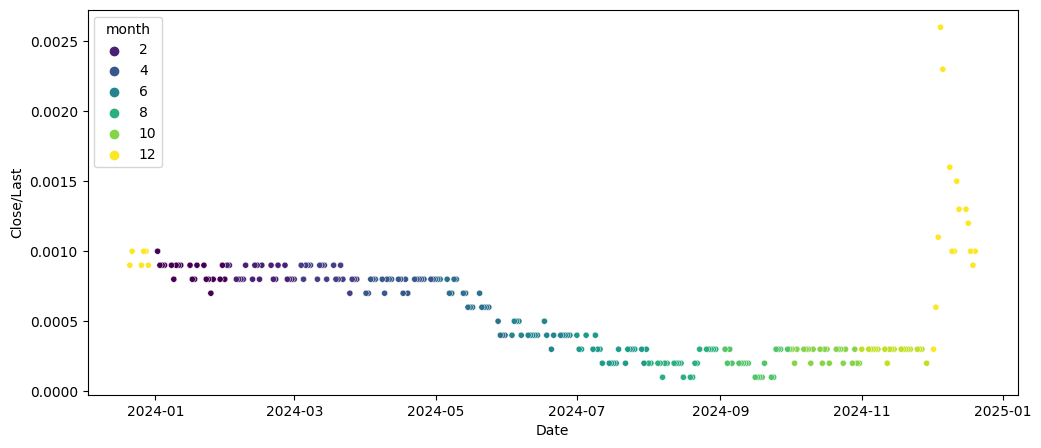

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='Close/Last', hue='month', palette='viridis', s=20)

What we have here looks a lot like a penny stock, and not surprisingly it has a long period of stability and a sudden jump in prices. Adding the month as a color gives us a sense of the passage of time, even though we have one repeated color.

Let's look at the relationship between the price and volume to see what a positive price/volume correlation looks like in the wild.

<Axes: xlabel='Close/Last', ylabel='Volume'>

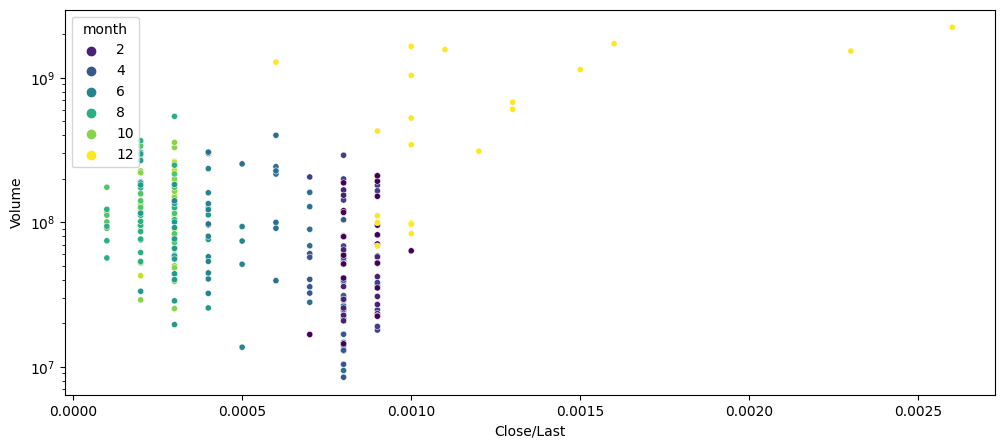

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='Close/Last', y='Volume', hue='month', palette='viridis', s=20)

Here we're actually looking at the relationship between the price and the log of the volume, because we have a lot of volumes that are very similar and a few outliers. What do we see? We see that most of the time the prices and volumes are in a relatively narrow range; then we also have a relatively few quotes with relatively high prices and high volume.